# Early Diabetes Prediction
Diabetes is a serious problem which many people face nowadays and which can lead to other serious health diseases.During the period of Covid-19 we also came to know that the conditions of a diabetic patient is much more critical than a non-diabetic patient.So if we can take help of deep learning to predict the risk of getting diabetic it will be helpful for people.

## Imorting the dataset

In [1]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/diabetes.zip"
!unzip -qo diabetes.zip 
!rm diabetes.zip

--2020-11-20 01:08:09--  https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/diabetes.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.62.68
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.62.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12371 (12K) [application/x-zip-compressed]
Saving to: ‘diabetes.zip’

diabetes.zip        100%[===================>]  12.08K  --.-KB/s    in 0s      

2020-11-20 01:08:09 (120 MB/s) - ‘diabetes.zip’ saved [12371/12371]



## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

## Data Analysis and Data Cleaning

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [7]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    df[col].replace(0, np.NaN, inplace=True)
    
df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   739 non-null    float64
 2   BloodPressure             710 non-null    float64
 3   SkinThickness             529 non-null    float64
 4   Insulin                   385 non-null    float64
 5   BMI                       734 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 58.1 KB


In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 1 to 1567
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               381 non-null    int64  
 1   Glucose                   381 non-null    float64
 2   BloodPressure             381 non-null    float64
 3   SkinThickness             381 non-null    float64
 4   Insulin                   381 non-null    float64
 5   BMI                       381 non-null    float64
 6   DiabetesPedigreeFunction  381 non-null    float64
 7   Age                       381 non-null    int64  
 8   Outcome                   381 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 29.8 KB


In [9]:
X = df.drop('Outcome', axis=1)
X = StandardScaler().fit_transform(X)
y = df['Outcome']

## Test-Train Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304, 8), (77, 8), (304,), (77,))

## Model Architecture

In [13]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = X_train[0].shape))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='relu')) 

model.add(Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [14]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [15]:
checkpointer = ModelCheckpoint('diabetes.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(X_train, y_train, batch_size=16, epochs=350, validation_data=(X_test, y_test), callbacks=[checkpointer])

Epoch 1/350
 9/19 [=============>................] - ETA: 0s - loss: 0.6813 - acc: 0.6250
Epoch 00001: val_acc improved from -inf to 0.67532, saving model to diabetes.h5
19/19 [==============================] - 0s 25ms/step - loss: 0.6786 - acc: 0.6546 - val_loss: 0.6746 - val_acc: 0.6753
Epoch 2/350
 1/19 [>.............................] - ETA: 0s - loss: 0.6791 - acc: 0.6875
Epoch 00002: val_acc improved from 0.67532 to 0.71429, saving model to diabetes.h5
19/19 [==============================] - 0s 6ms/step - loss: 0.6764 - acc: 0.6579 - val_loss: 0.6724 - val_acc: 0.7143
Epoch 3/350
 1/19 [>.............................] - ETA: 0s - loss: 0.6822 - acc: 0.6250
Epoch 00003: val_acc improved from 0.71429 to 0.72727, saving model to diabetes.h5
19/19 [==============================] - 0s 8ms/step - loss: 0.6742 - acc: 0.6579 - val_loss: 0.6699 - val_acc: 0.7273
Epoch 4/350
 1/19 [>.............................] - ETA: 0s - loss: 0.6989 - acc: 0.3750
Epoch 00004: val_acc improved from 0

In [16]:
present_model = keras.models.load_model('diabetes.h5')
present_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [17]:
print("Accuracy of our model on test data : " , present_model.evaluate(X_test,y_test)[1]*100 , "%")

3/3 [==============================] - 0s 6ms/step - loss: 0.4183 - acc: 0.8052
Accuracy of our model on test data :  80.51947951316833 %


## Training Plots

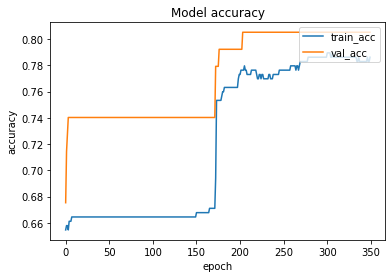

In [18]:
# plot the training artifacts
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

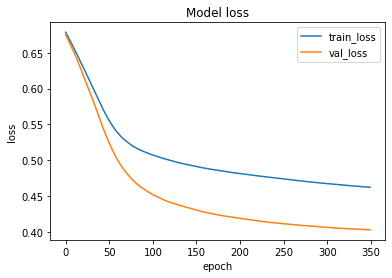

In [19]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

## Accessing the Performance of the Model

In [20]:
# predicting on test data.
pred_test = present_model.predict(X_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

In [21]:

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Not Diabetic")
        else:
            print("Diabetic")

In [22]:
view_result(pred_test[:10])

Not Diabetic
Not Diabetic
Not Diabetic
Diabetic
Not Diabetic
Diabetic
Not Diabetic
Not Diabetic
Not Diabetic
Diabetic


In [23]:
view_result(y_test[:10])

Not Diabetic
Not Diabetic
Not Diabetic
Diabetic
Not Diabetic
Diabetic
Diabetic
Not Diabetic
Not Diabetic
Diabetic


## Compiling the model with DeepC Compiler

In [25]:
!deepCC diabetes.h5

reading [keras model] from 'diabetes.h5'
Saved 'diabetes.onnx'
reading onnx model from file  diabetes.onnx
Model info:
  ir_vesion :  4 
  doc       : 
WARN (ONNX): terminal (input/output) dense_input's shape is less than 1.
             changing it to 1.
WARN (ONNX): terminal (input/output) dense_3's shape is less than 1.
             changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_3) as io node.
running DNNC graph sanity check ... passed.
Writing C++ file  diabetes_deepC/diabetes.cpp
INFO (ONNX): model files are ready in dir diabetes_deepC
g++ -std=c++11 -O3 -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 diabetes_deepC/diabetes.cpp -o diabetes_deepC/diabetes.exe
Model executable  diabetes_deepC/diabetes.exe
